In [ ]:
#importing data
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\MMachine learning\ai_assistant_usage_student_life.csv.xls')
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
#check the daset shape(rows, columns)
df.shape

(10000, 11)

In [6]:
#disply column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [8]:
#missing values
df.isnull()
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [10]:
#show summary statistics
df.SessionLengthMin.describe()

count    10000.000000
mean        19.846467
std         13.897302
min          0.030000
25%          9.630000
50%         16.650000
75%         26.670000
max        110.810000
Name: SessionLengthMin, dtype: float64

In [11]:
#show summary stats
df.TotalPrompts.describe()

count    10000.000000
mean         5.607500
std          4.648764
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         39.000000
Name: TotalPrompts, dtype: float64

In [12]:
#find the number of unique values in studentlevel, discipline, and Task type
 #find the number of unique values in StudentLevel, Discipline, and TaskType
student_levels = df.StudentLevel.unique()
student_level_number = df.StudentLevel.nunique()
print(student_levels)
print(student_level_number)

['Undergraduate' 'Graduate' 'High School']
3


In [13]:
discipline = df.Discipline.unique()
discipline_number = df.Discipline.nunique()
print(discipline)
print(discipline_number)

['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']
7


In [16]:
task_type = df.TaskType.unique()
task_type_number = df.TaskType.nunique()
print(task_type)
print(task_type_number)

['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']
6


In [ ]:
#which type is the most common
most_common_type=df.TaskType.mode()
print(most_common_type)


0    Writing
Name: TaskType, dtype: object


In [18]:
df.TaskType.value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

In [ ]:
#Calculate the average SessionLengthMin for each StudentLevel.
average_len_min=df.groupby("StudentLevel") ["SessionLengthMin"].mean()
print(average_len_min)


StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64


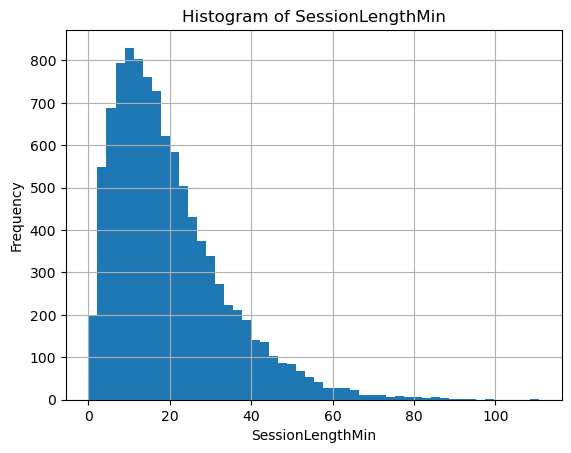

In [30]:
#plot a histogram of SessionLengthMin
import matplotlib.pyplot as plt
df["SessionLengthMin"].hist(bins=50)

plt.title("Histogram of SessionLengthMin")
plt.xlabel("SessionLengthMin")
plt.ylabel("Frequency")

plt.show()

In [ ]:
#create a barchart of sessions counts by studentlevel
plt.bar(Transmission, Count)
plt.title('Transmission type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()


In [35]:
df["StudentLevel"].value_counts()

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64

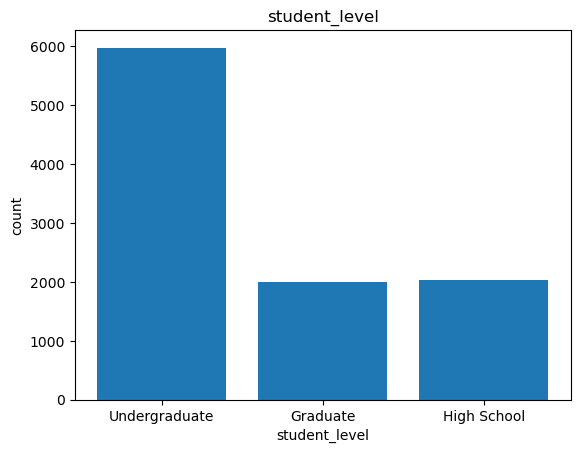

In [36]:
#Create a bar chart of session counts by StudentLevel.
student_level = ["Undergraduate", "Graduate", "High School"]
df["StudentLevel"].value_counts()
count = [5978,1995,2027]

plt.bar(student_level, count)
plt.title('student_level')
plt.xlabel('student_level')
plt.ylabel('count')

plt.show()

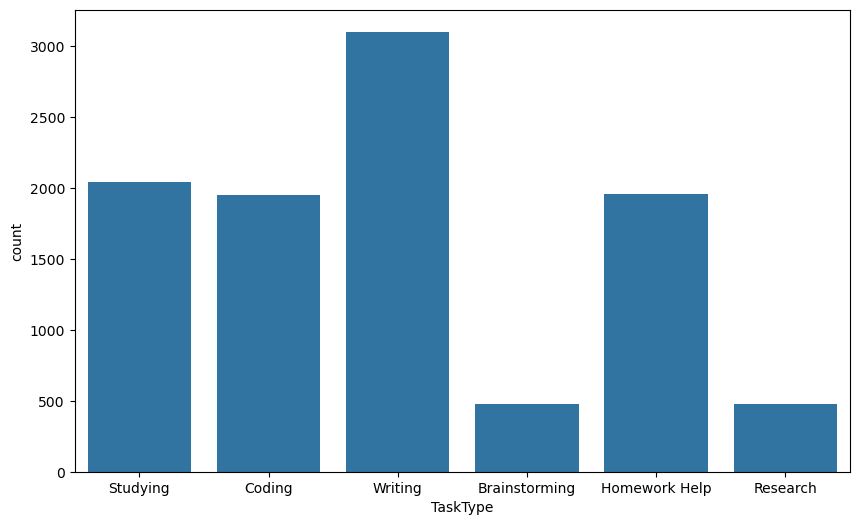

In [38]:
#make  a count plot of task plot using seaborn
import seaborn as sns
plt.figure(figsize= (10,6))
sns.countplot(x="TaskType", data=df)

plt.show()

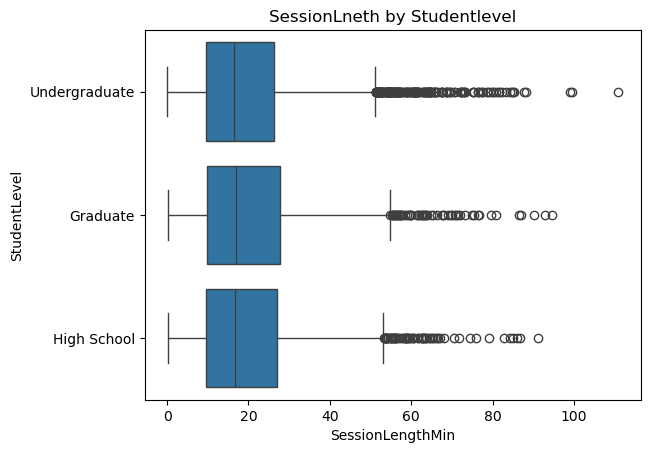

In [ ]:
#plot a boxplot about sessionlength grouped by student level
sns.boxplot(x="SessionLengthMin", y="StudentLevel", data=df)
plt.title("SessionLength by Studentlevel")
plt.show()

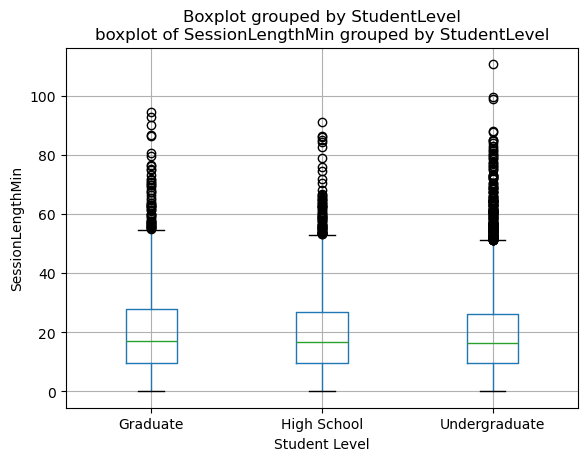

In [41]:
df.boxplot(column="SessionLengthMin", by="StudentLevel")

plt.title("boxplot of SessionLengthMin grouped by StudentLevel")
plt.xlabel("Student Level")
plt.ylabel("SessionLengthMin")
plt.show()

In [53]:
df.FinalOutcome.value_counts()

FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64

<Axes: title={'center': 'Proportions of FinalOutcome'}>

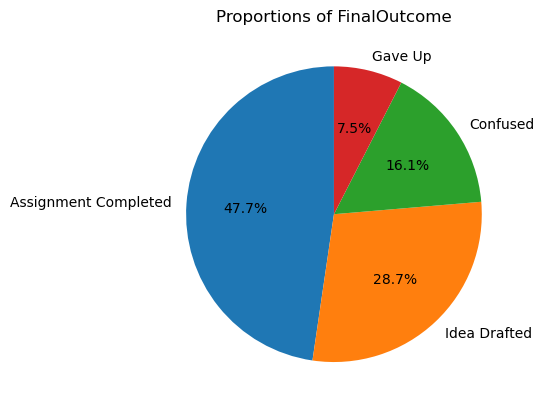

In [54]:
#create a pie chart showing propotions of final outcomes
df["FinalOutcome"].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    ylabel="",         # removes extra label
    title="Proportions of FinalOutcome"
)
